# m_cfd_of

Saang Bum Kim <br>
2020-09-21 08:30:46

In [ ]:
%
%%  PART 0.     Opening
%
fclose all; close all
clc
clear all
tcomp = tic;
telap = toc(tcomp);

s_dir = 'git/openfoam_seo/of/org/cavity/';
% s_dir = 'git/openfoam_seo/wtt/jbk/';

seo_init

id_f = 1;
% id_sv = true;
id_sv = false;
% id_pl = true;
id_pl = false;

% id_jupyter = false;
id_jupyter = true;

In [ ]:
clear sb

# Pre Process

## from CSL: rid

In [ ]:
% cd ~/Work/git/openfoam_seo/wtt/jbk/

In [ ]:
% model = mphload('cavity_01.mph')
model = mphload('cavity_02.mph')

In [ ]:
% mphmesh(model)
% x = model.mesh("mesh1").getVertex();

In [ ]:
[meshstats,meshdata] = mphmeshstats(model);

### sb

In [ ]:
sb.v.n = size(meshdata.vertex,2);
sb.v.x = meshdata.vertex;
sb.v.xn = [[sb.v.x;zeros(1,sb.v.n)],[sb.v.x;ones(1,sb.v.n)]];
sb.b4.n = size(meshdata.elem{2},2);
sb.b4.id = meshdata.elem{2}+1;
sb.b3.n = size(meshdata.elem{3},2);
sb.b3.id = meshdata.elem{3}+1;

In [ ]:
sb.box_ids = model.selection.tags();
sb.box_n = length(sb.box_ids);
% for ii=1:7
% for ii=[1 4:7]
for ii=1:sb.box_n
    % sb.box(ii) = mpheval(model,'X','selection',sprintf('box%d',ii));
    sb.box(ii) = mpheval(model,'X','selection',sb.box_ids(ii));
end

In [ ]:
% for ii=1:7
% for ii=[1 4:7]
for ii=1:sb.box_n
    % ii = 1;
    sb.box(ii).n = size(sb.box(ii).t,2);
    for jj = 1:size(sb.box(ii).p,2)
        % jj = 1;
        x_ii = sb.box(ii).p(:,jj);
        lc1 = find(sb.v.x(1,:) == x_ii(1));
        lc2 = find(sb.v.x(2,lc1) == x_ii(2));
        lc = lc1(lc2);
        sb.box(ii).id(jj) = lc;
        if any(size(lc) ~= [1,1])
            fprintf('Error: %d %d', ii, jj)
        end
    end
    for jj = 1:sb.box(ii).n
        sb.box(ii).lc(:,jj) = sb.box(ii).id( sb.box(ii).t(:,jj)+1 );
    end
end

In [ ]:
% save imsi_tower_200923 meshdata sb

### data load

In [8]:
% whos -file imsi_tower_200923
% load imsi_tower_200923
eval(sprintf('whos -file res_cfd_%s', datestr(now(),'yymmdd')))
load(sprintf('res_cfd_%s', datestr(now(),'yymmdd')))

  Name          Size            Bytes  Class     Attributes

  meshdata      1x1             14986  struct              
  sb            1x1             56320  struct              



In [ ]:
% meshdata

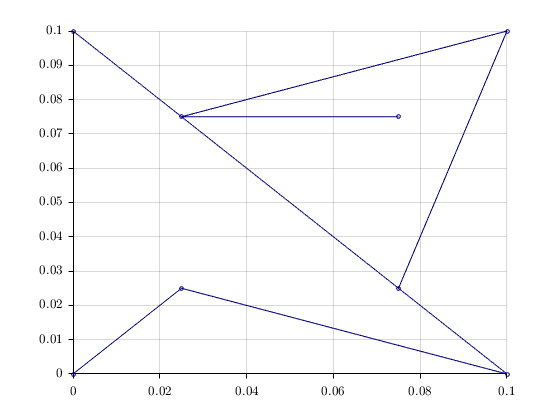

In [9]:
% if id_pl
if 1
lc = meshdata.elem{find(cellfun(@(x) strcmpi(x,'vtx'), meshdata.types))}+1;
id_pause = true;
figure(1)
for ii=1:length(lc)-1
    plot(meshdata.vertex(1,lc(ii+[0,1])),meshdata.vertex(2,lc(ii+[0,1])), ...
        'o-','Color',rgb('Navy'),'MarkerSize',6-3)
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
end
end

In [ ]:
if id_pl
sb.box(1)
sb.box(1).d1(1:3)
sb.box(1).p(:,1:3)
sb.box(1).t(:,1:3)
sb.box(1).ve(1:3,:)
end

### c_box

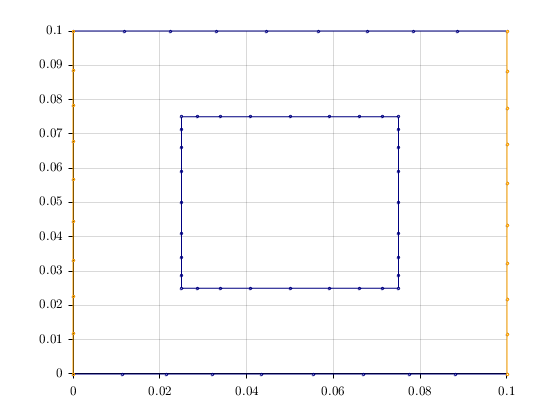

In [20]:
% if id_pl
if 1
id_pause = true;
figure(1)
clf
for jj=1:sb.box_n
for ii=1:size(sb.box(jj).t,2)
    id = sb.box(jj).t(:,ii)+1;
    x_id = sb.box(jj).p(:,id);
% plot(sb.box(1).p(1,ii),sb.box(1).p(2,ii),'o','MarkerSize',6-4)
plot(x_id(1,:),x_id(2,:),'-o','MarkerSize',6-4,'Color',rgb('Navy'))
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
end
end
end
% figure(2)
% plot(sb.box(2).ve)
% if 0
if 1
jj = 2;
for ii=1:size(sb.box(jj).t,2)
    id = sb.box(jj).t(:,ii)+1;
    x_id = sb.box(jj).p(:,id);
% plot(sb.box(1).p(1,ii),sb.box(1).p(2,ii),'o','MarkerSize',6-4)
plot(x_id(1,:),x_id(2,:),'-s','MarkerSize',6-4,'Color',rgb('Orange'))
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
end
end

### triangular

In [ ]:
if id_pl
i_34 = 'b3';
% i_34 = 'b4';
id_pause = true;
figure(1)
clf
for ii=1:sb.(i_34).n
% for ii=1:2^0
% for ii=1:2^2
% for ii=1:2^4
    plot(sb.v.x(1,sb.(i_34).id(:,ii)), sb.v.x(2,sb.(i_34).id(:,ii)), '-o', 'MarkerSize', 6-3)
    for jj=1:length(sb.(i_34).id(:,ii))
        text(sb.v.x(1,sb.(i_34).id(jj,ii)), sb.v.x(2,sb.(i_34).id(jj,ii)), sprintf('%d',jj))
    end
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
end
end

### quad

In [ ]:
if id_pl
% i_34 = 'b3';
i_34 = 'b4';
id_pause = true;
figure(1)
clf
% for ii=1:sb.(i_34).n
% for ii=1:2^0
for ii=1:2^2
% for ii=1:2^4
    plot(sb.v.x(1,sb.(i_34).id(:,ii)), sb.v.x(2,sb.(i_34).id(:,ii)), '-o', 'MarkerSize', 6-3)
    for jj=1:length(sb.(i_34).id(:,ii))
        text(sb.v.x(1,sb.(i_34).id(jj,ii)), sb.v.x(2,sb.(i_34).id(jj,ii)), sprintf('%d',jj))
    end
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
end
end

### Whole

In [ ]:
if id_pl
% i_34 = 'b3';
i_34 = 'b4';
id_pause = true;
figure(1)
clf
for ii=1:sb.(i_34).n
% for ii=1:2^0
% for ii=1:2^2
% for ii=1:2^10
    plot(sb.v.x(1,sb.(i_34).id(:,ii)), sb.v.x(2,sb.(i_34).id(:,ii)), '-o', 'MarkerSize', 6-3)
    for jj=1:length(sb.(i_34).id(:,ii))
        text(sb.v.x(1,sb.(i_34).id(jj,ii)), sb.v.x(2,sb.(i_34).id(jj,ii)), sprintf('%d',jj))
    end
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
end
i_34 = 'b3';
% for ii=1:2^2
for ii=1:2^8
    plot(sb.v.x(1,sb.(i_34).id(:,ii)), sb.v.x(2,sb.(i_34).id(:,ii)), '-o', 'MarkerSize', 6-3)
    for jj=1:length(sb.(i_34).id(:,ii))
        text(sb.v.x(1,sb.(i_34).id(jj,ii)), sb.v.x(2,sb.(i_34).id(jj,ii)), sprintf('%d',jj))
    end
%     if id_pause
%         gcfG;gcfH;gcfLFont;gcfS;%gcfP
%         id_pause = false;
%     end
end
end

### openFoam

In [ ]:
fid = fopen(sprintf('blockMeshDict_cfd_%s.foam',datestr(now,'yymmdd')),'w+');

fprintf(fid,'/*--------------------------------*- C++ -*----------------------------------*\\\n');
fprintf(fid,'| =========                 |                                                 |\n');
fprintf(fid,'| \\\\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |\n');
fprintf(fid,'|   \\\\  /    O peration     | Web:      https://www.OpenFOAM.org              |\n');
fprintf(fid,'|  \\\\    /   A nd           | Version:  8                                     |\n');
fprintf(fid,'|    \\\\/     M anipulation  |                                                 |\n');
fprintf(fid,'\\*---------------------------------------------------------------------------*/\n');
fprintf(fid,'FoamFile\n');
fprintf(fid,'{\n');
fprintf(fid,'    version     2.0;\n');
fprintf(fid,'    format      ascii;\n');
fprintf(fid,'    class       dictionary;\n');
fprintf(fid,'    object      blockMeshDict;\n');
fprintf(fid,'}\n');
fprintf(fid,'// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //\n');
fprintf(fid,'\n');
fprintf(fid,'convertToMeters 1;\n');
fprintf(fid,'\n');
fprintf(fid,'vertices\n');
fprintf(fid,'(\n');

for ii=1:size(meshdata.vertex,2)
% for ii=1:2^4
    fprintf(fid,'(%f %f 0)\n',meshdata.vertex(:,ii) );
    % fprintf(fid,'(%.56f %.56f)\n',meshdata.vertex(:,ii) );
end

for ii=1:size(meshdata.vertex,2)
% for ii=1:2^4
    fprintf(fid,'(%f %f 1)\n',meshdata.vertex(:,ii) );
    % fprintf(fid,'(%.56f %.56f)\n',meshdata.vertex(:,ii) );
end

% fprintf(fid,'vertices #codeStream\n');
% fprintf(fid,'{\n');
% fprintf(fid,'    codeInclude\n');
% fprintf(fid,'    #{\n');
% fprintf(fid,'        #include "pointField.H"\n');
% fprintf(fid,'    #};\n');
% fprintf(fid,'\n');
% fprintf(fid,'    code\n');
% fprintf(fid,'    #{\n');
% fprintf(fid,'        pointField points(%d);\n'%int(np.shape(of_xyz)[1]/2));
% % for ii in range(len(of_xyz[0])):
% for ii in range(int(np.shape(of_xyz)[1]/2)):
%     fprintf(fid,'        points[%d] = point(%f, %f, %f);\n'%(ii,of_xyz[0][ii],of_xyz[1][ii],of_xyz[2][ii]));
% fprintf(fid,'\n');
% fprintf(fid,'        // Duplicate z points\n');
% fprintf(fid,'        label sz = points.size();\n');
% fprintf(fid,'        points.setSize(2*sz);\n');
% fprintf(fid,'        for (label i = 0; i < sz; i++)\n');
% fprintf(fid,'        {\n');
% fprintf(fid,'            const point& pt = points[i];\n');
% fprintf(fid,'            points[i+sz] = point(pt.x(), pt.y(), -pt.z());\n');
% % fprintf(fid,'            points[i+sz] = point(pt.x(), pt.y(), 1);\n');
% fprintf(fid,'        }\n');
% fprintf(fid,'\n');
% fprintf(fid,'        os << points;\n');
% fprintf(fid,'    #};\n');
% fprintf(fid,'};\n');

fprintf(fid,');\n');
fprintf(fid,'\n');
fprintf(fid,'blocks\n');
fprintf(fid,'(\n');
% fprintf(fid,'    hex (0 1 2 3 4 5 6 7) (20 20 1) simpleGrading (1 1 1)\n');

% if 0
i_34 = 'b4';
for ii=1:sb.(i_34).n
    % ii = 1;
    lc = sb.(i_34).id(:,ii);
    % if 0
    %     id_pause = true;
    %     figure(1)
    %     plot(sb.v.x(1,lc),sb.v.x(2,lc))
    %     for jj=1:length(sb.(i_34).id(:,ii))
    %         text(sb.v.x(1,sb.(i_34).id(jj,ii)), sb.v.x(2,sb.(i_34).id(jj,ii)), sprintf('%d',jj))
    %     end
    %     if id_pause
    %         gcfG;gcfH;gcfLFont;gcfS;%gcfP
    %         id_pause = false;
    %     end
    % end
    % s_lc = [lc(1:2)+sb.v.n;lc([2,1]);lc(3:4)+sb.v.n;lc([4,3])];
    s_lc = [lc(1) lc(1)+sb.v.n lc(2)+sb.v.n lc(2) lc(3) lc(3)+sb.v.n lc(4)+sb.v.n lc(4)];
    fprintf(fid, '    hex (%d %d %d %d %d %d %d %d) (1 1 1) simpleGrading (1 1 1)\n', s_lc-1);
    % if 0
    %     i_34 = 'b4';
    %     ii = 1;
    %     ii = 2;
    %     ii = 4;
    %     lc = sb.(i_34).id(:,ii);
    %     s_lc = [lc(1) lc(1)+sb.v.n lc(2)+sb.v.n lc(2) lc(3) lc(3)+sb.v.n lc(4)+sb.v.n lc(4)];

    %     id_pause = true;
    %     figure(1)
    %     % clf
    %     plot3(sb.v.xn(1,s_lc),sb.v.xn(2,s_lc),sb.v.xn(3,s_lc),'-o', ...
    %         'MarkerSize',6-3)
    %         % 'MarkerSize',6-3,'Color',rgb('Navy'))
    %     for jj=1:length(sb.(i_34).id(:,ii))
    %         text(sb.v.x(1,sb.(i_34).id(jj,ii)), sb.v.x(2,sb.(i_34).id(jj,ii)), sprintf('%d',jj))
    %     end
    %     if id_pause
    %         gcfG;gcfH;gcfLFont;gcfS;%gcfP
    %         id_pause = false;
    %     end
    % end
end
% end
i_34 = 'b3';
for ii=1:sb.(i_34).n
    lc = sb.(i_34).id(:,ii);
    s_lc = [lc(1) lc(1)+sb.v.n lc(2)+sb.v.n lc(2) lc(3) lc(3)+sb.v.n lc(3)+sb.v.n lc(3)];
    fprintf(fid, '    hex (%d %d %d %d %d %d %d %d) (1 1 1) simpleGrading (1 1 1)\n', s_lc-1);
end

fprintf(fid,');\n');
fprintf(fid,'\n');
fprintf(fid,'edges\n');
fprintf(fid,'(\n');
fprintf(fid,');\n');
fprintf(fid,'\n');
fprintf(fid,'boundary\n');
fprintf(fid,'(\n');
fprintf(fid,'    movingWall\n');
% fprintf(fid,'    top\n');
fprintf(fid,'    {\n');
fprintf(fid,'        type wall;\n');
% fprintf(fid,'        type symmetryPlane;\n');
fprintf(fid,'        faces\n');
fprintf(fid,'        (\n');
% fprintf(fid,'            (3 7 6 2)\n');
% if 0
%     id_pause = true;
%     figure(1)
%     clf
%     for ii=1:size(sb.box(4).t,2)
%         id = sb.box(4).t(:,ii)+1;
%         x_id = sb.box(4).p(:,id);
%     % plot(sb.box(1).p(1,ii),sb.box(1).p(2,ii),'o','MarkerSize',6-4)
%     plot(x_id(1,:),x_id(2,:),'-o','MarkerSize',6-4,'Color',rgb('Navy'))
%         if id_pause
%             gcfG;gcfH;gcfLFont;gcfS;%gcfP
%             id_pause = false;
%         end
%     end
% end
    % id_bd = 7;
    id_bd = 4;
    for ii=1:sb.box(id_bd).n
        id = sb.box(id_bd).lc(:,ii);
        ids = [id+sb.v.n;id([2,1])];
        % x_id = sb.v.x(:,id);
        fprintf(fid,'            (%d %d %d %d)\n', ids-1 );
    end
fprintf(fid,'        );\n');
fprintf(fid,'    }\n');

if 1
    fprintf(fid,'    fixedWalls\n');
    fprintf(fid,'    {\n');
    fprintf(fid,'        type wall;\n');
    % fprintf(fid,'        type symmetryPlane;\n');
    fprintf(fid,'        faces\n');
    fprintf(fid,'        (\n');
    % fprintf(fid,'            (1 5 4 0)\n');
        % for id_bd = 2:6
        % for id_bd = [1 4 5 6]
        % for id_bd = 1:4
        for id_bd = [1 2 3 5 6 7 8]
            for ii=1:sb.box(id_bd).n
                id = sb.box(id_bd).lc(:,ii);
                % ids = [id+sb.v.n;id([2,1])];
                ids = [id;id([2,1])+sb.v.n];
                % x_id = sb.v.x(:,id);
                fprintf(fid,'            (%d %d %d %d)\n', ids-1 );
            end
        end
        fprintf(fid,'        );\n');
        fprintf(fid,'    }\n');
else

    fprintf(fid,'    bottom\n');
    fprintf(fid,'    {\n');
    fprintf(fid,'        type wall;\n');
    % fprintf(fid,'        type symmetryPlane;\n');
    fprintf(fid,'        faces\n');
    fprintf(fid,'        (\n');
    % fprintf(fid,'            (3 7 6 2)\n');
    % if 0
    %     id_pause = true;
    %     figure(1)
    %     clf
    %     for ii=1:size(sb.box(4).t,2)
    %         id = sb.box(4).t(:,ii)+1;
    %         x_id = sb.box(4).p(:,id);
    %     % plot(sb.box(1).p(1,ii),sb.box(1).p(2,ii),'o','MarkerSize',6-4)
    %     plot(x_id(1,:),x_id(2,:),'-o','MarkerSize',6-4,'Color',rgb('Navy'))
    %         if id_pause
    %             gcfG;gcfH;gcfLFont;gcfS;%gcfP
    %             id_pause = false;
    %         end
    %     end
    % end
        id_bd = 6;
        for ii=1:sb.box(id_bd).n
            id = sb.box(id_bd).lc(:,ii);
            ids = [id+sb.v.n;id([2,1])];
            % x_id = sb.v.x(:,id);
            fprintf(fid,'            (%d %d %d %d)\n', ids-1 );
        end
    fprintf(fid,'        );\n');
    fprintf(fid,'    }\n');

    fprintf(fid,'    inlet\n');
    fprintf(fid,'    {\n');
    % fprintf(fid,'        type wall;\n');
    fprintf(fid,'        type patch;\n');
    fprintf(fid,'        faces\n');
    fprintf(fid,'        (\n');
    % fprintf(fid,'            (3 7 6 2)\n');
    % if 0
    %     id_pause = true;
    %     figure(1)
    %     clf
    %     for ii=1:size(sb.box(4).t,2)
    %         id = sb.box(4).t(:,ii)+1;
    %         x_id = sb.box(4).p(:,id);
    %     % plot(sb.box(1).p(1,ii),sb.box(1).p(2,ii),'o','MarkerSize',6-4)
    %     plot(x_id(1,:),x_id(2,:),'-o','MarkerSize',6-4,'Color',rgb('Navy'))
    %         if id_pause
    %             gcfG;gcfH;gcfLFont;gcfS;%gcfP
    %             id_pause = false;
    %         end
    %     end
    % end
        id_bd = 4;
        for ii=1:sb.box(id_bd).n
            id = sb.box(id_bd).lc(:,ii);
            ids = [id+sb.v.n;id([2,1])];
            % x_id = sb.v.x(:,id);
            fprintf(fid,'            (%d %d %d %d)\n', ids-1 );
        end
    fprintf(fid,'        );\n');
    fprintf(fid,'    }\n');

    fprintf(fid,'    outlet\n');
    fprintf(fid,'    {\n');
    % fprintf(fid,'        type wall;\n');
    fprintf(fid,'        type patch;\n');
    fprintf(fid,'        faces\n');
    fprintf(fid,'        (\n');
    % fprintf(fid,'            (3 7 6 2)\n');
    % if 0
    %     id_pause = true;
    %     figure(1)
    %     clf
    %     for ii=1:size(sb.box(4).t,2)
    %         id = sb.box(4).t(:,ii)+1;
    %         x_id = sb.box(4).p(:,id);
    %     % plot(sb.box(1).p(1,ii),sb.box(1).p(2,ii),'o','MarkerSize',6-4)
    %     plot(x_id(1,:),x_id(2,:),'-o','MarkerSize',6-4,'Color',rgb('Navy'))
    %         if id_pause
    %             gcfG;gcfH;gcfLFont;gcfS;%gcfP
    %             id_pause = false;
    %         end
    %     end
    % end
        id_bd = 5;
        for ii=1:sb.box(id_bd).n
            id = sb.box(id_bd).lc(:,ii);
            ids = [id+sb.v.n;id([2,1])];
            % x_id = sb.v.x(:,id);
            fprintf(fid,'            (%d %d %d %d)\n', ids-1 );
        end
    fprintf(fid,'        );\n');
    fprintf(fid,'    }\n');

    fprintf(fid,'    deck\n');
    fprintf(fid,'    {\n');
    fprintf(fid,'        type wall;\n');
    % fprintf(fid,'        type symmetryPlane;\n');
    fprintf(fid,'        faces\n');
    fprintf(fid,'        (\n');
    % fprintf(fid,'            (3 7 6 2)\n');
    % if 0
    %     id_pause = true;
    %     figure(1)
    %     clf
    %     for ii=1:size(sb.box(4).t,2)
    %         id = sb.box(4).t(:,ii)+1;
    %         x_id = sb.box(4).p(:,id);
    %     % plot(sb.box(1).p(1,ii),sb.box(1).p(2,ii),'o','MarkerSize',6-4)
    %     plot(x_id(1,:),x_id(2,:),'-o','MarkerSize',6-4,'Color',rgb('Navy'))
    %         if id_pause
    %             gcfG;gcfH;gcfLFont;gcfS;%gcfP
    %             id_pause = false;
    %         end
    %     end
    % end
        id_bd = 1;
        for ii=1:sb.box(id_bd).n
            id = sb.box(id_bd).lc(:,ii);
            ids = [id+sb.v.n;id([2,1])];
            % x_id = sb.v.x(:,id);
            fprintf(fid,'            (%d %d %d %d)\n', ids-1 );
        end
    fprintf(fid,'        );\n');
    fprintf(fid,'    }\n');
end

fprintf(fid,'    frontAndBack\n');
fprintf(fid,'    {\n');
fprintf(fid,'        type empty;\n');
fprintf(fid,'        faces\n');
fprintf(fid,'        (\n');

i_34 = 'b4';
for ii=1:sb.(i_34).n
    lc = sb.(i_34).id(:,ii)-1;
    fprintf(fid,'            (%d %d %d %d)\n', lc([2,1,3,4]) );
    fprintf(fid,'            (%d %d %d %d)\n', lc([1,2,4,3])+sb.v.n );
end
i_34 = 'b3';
for ii=1:sb.(i_34).n
    lc = sb.(i_34).id(:,ii)-1;
    fprintf(fid,'            (%d %d %d %d)\n', lc([2,1,3,3]) );
    fprintf(fid,'            (%d %d %d %d)\n', lc([1,2,3,3])+sb.v.n );
end
fprintf(fid,'        );\n');
fprintf(fid,'    }\n');
fprintf(fid,');\n');
fprintf(fid,'\n');
fprintf(fid,'mergePatchPairs\n');
fprintf(fid,'(\n');
fprintf(fid,');\n');
fprintf(fid,'\n');
fprintf(fid,'// ************************************************************************* //\n');

fclose(fid);

### openFoam

In [ ]:
% fid = fopen(sprintf('controlDict_rib_%s.foam',datestr(now,'yymmdd')),'w+');

### openFoam

# Main Process

# Post Process

In [6]:
save(sprintf('res_cfd_%s', datestr(now(),'yymmdd')),'sb','meshdata')

# FINE